# Programming for Data Analysis Project

Notebook for the Project for Programming for Data Analysis module @ GMIT - 2020

Author: Maciej Izydorek (G00387873@gmit.ie) Github: [mizydorek](https://github.com/mizydorek/Machine-Learning-Tasks-2020)

***

#### Table of contents
1. [Problem statement](#Problem-statement)
2. [Cardiovascular diseases](#Cardiovascular_diseases)
3. [Introduction](#Introduction)
    * [Content](#Content)
    * [Packages](#Packages)
    * [Dataset](#dataset)
    * [Standard Missing values](#Standard_Missing_values)
    * [Non-Standard Missing values](#Non-Standard-Missing-values)
    * [Negative values](#Negative-values)
    * [Correlation](#Correlations)
    * [Sex](#sex)
    * [Risk Factors](#risk-factors)
    * [Outliers](#outliers)
    * [Distribution](#Distribution)
    
4. [Data Synthesis](#Data-Synthesis)
    * [Sex](#Content)
    * [Smoking](#Packages)
    * [Diabetes](#dataset)
    * [Anaemia](#Standard_Missing_values)
    * [High Blood Pressure](#Non-Standard-Missing-values)
    * [Death event](#Negative-values)
    * [Serum sodium](#Serum-sodium)
    * [Platelets](#Platelets)
    * [Ejection Fraction](#Ejection-Fraction)
    * [Creatinine phosphokinase](#Creatinine-phosphokinase)
    * [Serum Creatinine](#Serum-Creatinine)
    * [Time](#Time)
    * [Summary](#Summary)
5. [Conclusion](#Conclusion)
6. [References](#References)


#### — 1. Problem statement
*For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the **numpy.random** package for this purpose.*

*Specifically, in this project you should:*

• *Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.*

• *Investigate the types of variables involved, their likely distributions, and their relationships with each other.*

• *Synthesise/simulate a data set as closely matching their properties as possible.*

• *Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.*

*Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set.*

***

#### — 2. Cardiovascular diseases 

![Cardiovascular diseases](https://www.clearlake-specialties.com/wp-content/uploads/SystolicDiastolic_Heartfailure.5518685646fab-e1553788922847.png)

>Cardiovascular disease (CVD) is a general term for a disease of the heart or blood vessels. Blood flow to the heart, brain or body is reduced because of: a blood clot (thrombosis) a build-up of fatty deposits inside an artery, leading to hardening and narrowing of the artery (atherosclerosis). **Main Risk Factors: High blood pressure; Tobacco smoking; Diabetes** — [HSE](https://www.hse.ie/eng/health/az/c/cardiovascular-disease)

***

#### — 3. Introduction

The scope of this project is to synthesise a dataset of Cardiovascular diseases dataset found on [kaggle](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data) and analyse of the trends in heart diseases according to the risk factors. 

The simulated dataset will be recreated by breaking down distributions of features using normality tests, finding best fitted distribution and their correlations by plotting histograms and boxplots to vizualize data. With closer look at how the gender might has determine dependence among the risk factors and finally summarizing dataset.

**Dataset description:**

>Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.
>
>Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
>
>People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

#### — Packages

In [1]:
# Numerical arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd 

# Plotting.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# import Scipy.stats package
import scipy.stats as ss

# plot settings
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [16,9]

# Set your custom color palette
colors = ["#495057", "#212529", "#6C757D", "#ADB5BD", "#CED4DA"]
sns.set_palette(sns.color_palette(colors))
cmap = matplotlib.colors.ListedColormap(colors)

#### — Dataset

Imported Heart Failure dataset contains 299 records and 13 features. The features include sex, age, some risk factors associated to cardiovascular disease such as diabetes, high blood pressure etc., some cardiovascular metrics and death event details. Among all of them, some are boolean and some measurement values.

In [2]:
# Load dataset.
df = pd.read_csv("heart.csv")

In [3]:
# Preview of dataset.
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,75.0,55.00,65.0,50.0,65.0,90.0,75.0,60.0,65.00,80.0
anaemia,0.0,0.00,0.0,1.0,1.0,1.0,1.0,1.0,0.00,1.0
creatinine_phosphokinase,582.0,7861.00,146.0,111.0,160.0,47.0,246.0,315.0,157.00,123.0
diabetes,0.0,0.00,0.0,0.0,1.0,0.0,0.0,1.0,0.00,0.0
ejection_fraction,20.0,38.00,20.0,20.0,20.0,40.0,15.0,60.0,65.00,35.0
high_blood_pressure,1.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.00,1.0
platelets,265000.0,263358.03,162000.0,210000.0,327000.0,204000.0,127000.0,454000.0,263358.03,388000.0
serum_creatinine,1.9,1.10,1.3,1.9,2.7,2.1,1.2,1.1,1.50,9.4
serum_sodium,130.0,136.00,129.0,137.0,116.0,132.0,137.0,131.0,138.00,133.0
sex,1.0,1.00,1.0,1.0,0.0,1.0,1.0,1.0,0.00,1.0


#### — Content

1. Age: Age of the patient, *Measurement: Years [40 - 95]*

2. Anemia: Decrease of red blood cells or hemoglobin, *Measurement: Boolean [0, 1], 0 = No, 1 = Yes*

3. High blood pressure: If a patient has hypertension, *Measurement: Boolean [0, 1], 0 = No, 1 = Yes*

4. Creatinine phosphokinase (CPK): evel of the CPK enzyme in the blood, *Measurement: mcg/L  [23 - 7861]**

5. Diabetes: If the patient has diabetes, *Measurement: Boolean [0, 1], 0 = No, 1 = Yes*

6. Ejection fraction: Percentage of blood leaving, *Measurement: Percentage [14 - 80]*

7. Sex : Woman or man, *Measurement: Binary [0, 1], Female = 0, Male = 1*

8. Platelets: Platelets in the blood, *Measurement: kiloplatelets/mL [25.01 - 850.00]**

9. Serum creatinine : Level of creatinine in the blood, *Measurement: mg/dL [0.50 - 9.40]**

10. Serum sodium: Level of sodium in the blood, *Measurement: mEq/L [114 - 148]**

11. Smoking: If the patient smokes, *Measurement: Boolean [0, 1], 0 = No, 1 = Yes*

12. Time: Follow-up period, *Measurement: Days [4 - 285]*

13. Death event: If the patient died during the follow-up period, *Measurement: Boolean [0, 1], 0 = No, 1 = Yes*

**mcg/L: micrograms per liter. mL: microliter. mEq/L: milliequivalents per litre*<br>




In [4]:
# Shape of dataset.
df.shape

(299, 13)

In [5]:
# Print metadata about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
# Have a look at some basic statistical details.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


#### — Standard Missing values

In [7]:
# check if dataset contains any missing values.
# https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### — Non-Standard Missing values

In [8]:
# check if dataset contains any missing values according to specified list.
# https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe
missing_values=['n/a', 'na', '--', ' ']
df = pd.read_csv('heart.csv', na_values=missing_values)
df.isna().sum().sum()

0

#### — Negative values

In [9]:
# checks if dataset contains any negative values
df[(df.iloc[:,:] < 0)].sum()

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

#### — Outliers

Box plots are very useful to provide a visual summary of the data that enabling to identify outliers, the dispersion of data set and shows if data is normally distributed or skewed. When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot.


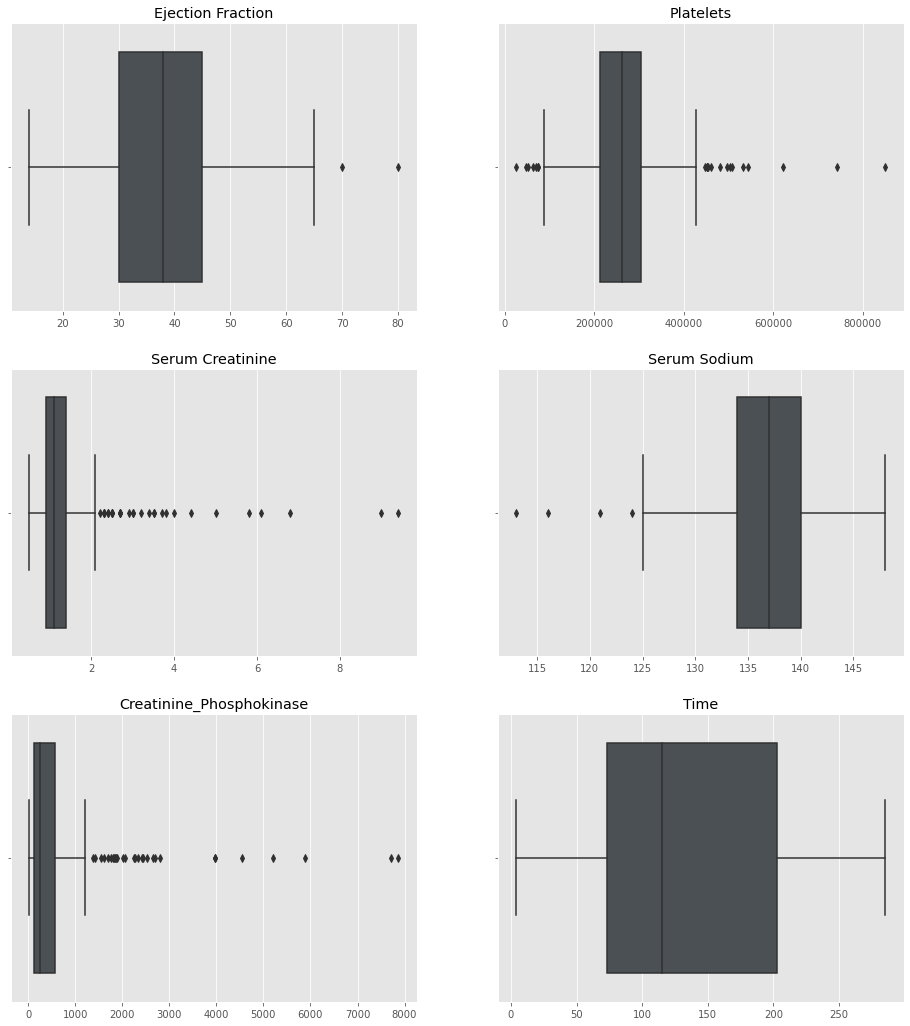

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(16,18))
sns.boxplot(data=df, x=df['ejection_fraction'], ax=axes[0,0]).set(title='Ejection Fraction', xlabel="");
sns.boxplot(data=df, x=df['platelets'], ax=axes[0,1]).set(title='Platelets', xlabel="");
sns.boxplot(data=df, x=df['serum_creatinine'], ax=axes[1,0]).set(title='Serum Creatinine', xlabel="");
sns.boxplot(data=df, x=df['serum_sodium'], ax=axes[1,1]).set(title='Serum Sodium', xlabel="");
sns.boxplot(data=df, x=df['creatinine_phosphokinase'], ax=axes[2,0]).set(title='Creatinine_Phosphokinase', xlabel="");
sns.boxplot(data=df, x=df['time'], ax=axes[2,1]).set(title='Time', xlabel="");

From above box plots it can be observed that ejection fraction and serum sodium both have just a few outliers, respectively two and four. So in this case those outliers can be treated as an anomaly and reject them as they will not affect on the rest of the set as well as extreme outliers in serum creatinine, platelets and creatinine phosphokinase. 


Creatinine phosphokinase:  *Measurement: mcg/L  [23 - 3000]**

Ejection fraction: *Measurement: Percentage [14 - 69]*

Platelets: *Measurement: kiloplatelets/mL [25.01 - 600.00]**

Serum creatinine : *Measurement: mg/dL [0.50 - 7.00]**

Serum sodium: *Measurement: mEq/L [125 - 148]**

**mcg/L: micrograms per liter. mL: microliter. mEq/L: milliequivalents per litre*

#### — Dataframe

Dataset has to be corrected accordingly to the outliers found above.

In [11]:
df = df.drop(df[(df['ejection_fraction'] > 69 ) | 
                    (df['platelets'] > 600000) | 
                    (df['serum_creatinine'] > 7.0) | 
                    (df['serum_sodium'] < 125.0) | 
                    (df['creatinine_phosphokinase'] > 3000)].index)

In [12]:
# Shape of dataset.
df.shape

(282, 13)

#### — Correlation

Knowing that there are no negative or standard and non-standard missing values in dataset let's have a look at distribution of features and their correlation and how can they might have determine dependence among the other.

In [13]:
# Use Pandas corr() function to check correlations between features.
corr = df.iloc[:,:].corr()
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.070765,-0.102173,-0.077797,0.097115,0.092364,-0.026865,0.191114,-0.050201,0.049580,-0.010635,-0.235343,0.264425
anaemia,0.070765,1.000000,-0.141326,-0.006479,0.037452,0.015358,-0.021942,-0.004191,0.077315,-0.080425,-0.103233,-0.146234,0.049415
creatinine_phosphokinase,-0.102173,-0.141326,1.000000,0.023200,-0.076458,-0.043230,-0.043722,-0.070557,0.057790,0.035513,-0.079846,0.148685,-0.031192
diabetes,-0.077797,-0.006479,0.023200,1.000000,0.006240,-0.007362,0.070240,-0.053365,-0.049163,-0.147803,-0.132201,0.034987,-0.010644
ejection_fraction,0.097115,0.037452,-0.076458,0.006240,1.000000,0.048216,0.102844,-0.142484,0.167069,-0.117904,-0.043280,0.032283,-0.292884
high_blood_pressure,0.092364,0.015358,-0.043230,-0.007362,0.048216,1.000000,0.060642,-0.092395,0.031500,-0.103032,-0.051285,-0.212295,0.056408
platelets,-0.026865,-0.021942,-0.043722,0.070240,0.102844,0.060642,1.000000,-0.066337,0.028355,-0.141284,-0.018815,0.005792,-0.054603
serum_creatinine,0.191114,-0.004191,-0.070557,-0.053365,-0.142484,-0.092395,-0.066337,1.000000,-0.267555,0.086390,-0.045181,-0.144899,0.265289
serum_sodium,-0.050201,0.077315,0.057790,-0.049163,0.167069,0.031500,0.028355,-0.267555,1.000000,-0.067318,0.008362,0.069106,-0.183454
sex,0.049580,-0.080425,0.035513,-0.147803,-0.117904,-0.103032,-0.141284,0.086390,-0.067318,1.000000,0.439352,-0.018982,0.025644


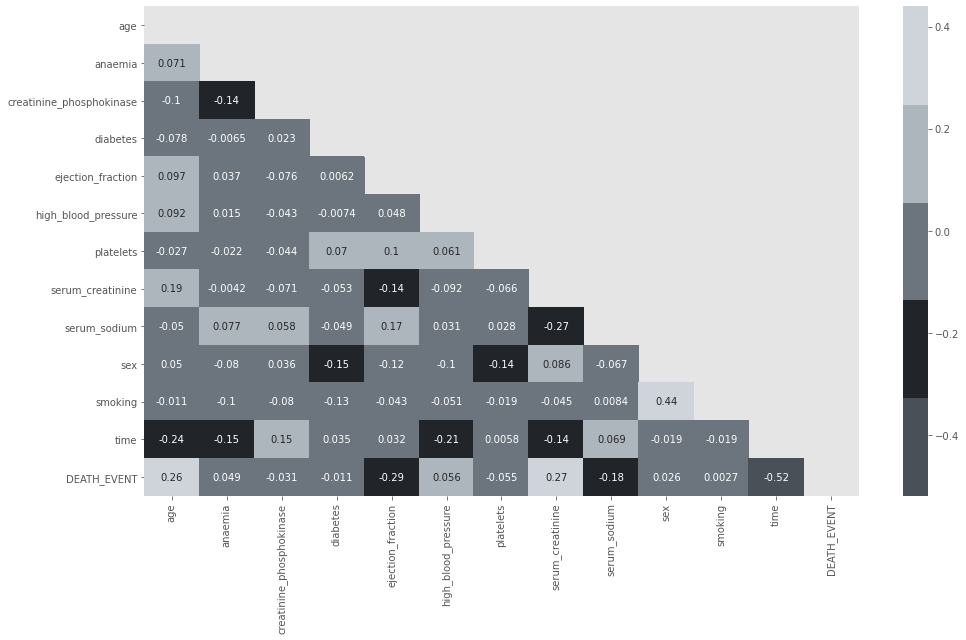

In [14]:
# For better overview of the correlation among all features let's visualize them using Seaborn heatmap.
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask, annot=True, cmap=cmap);


Looking at the correlation matrix above, it clearly shows that there is no major correlation between features of dataset. Higher correlation can be noticeably observed between pairs of sex and smoking, serum creatinine and death event as well as age and death event. Let's check the histograms for those pairs. More about on how elevated serum creatinine has been associated with increased mortality of cardiovascular disease can be read in this [paper](https://pubmed.ncbi.nlm.nih.gov/9056611/).



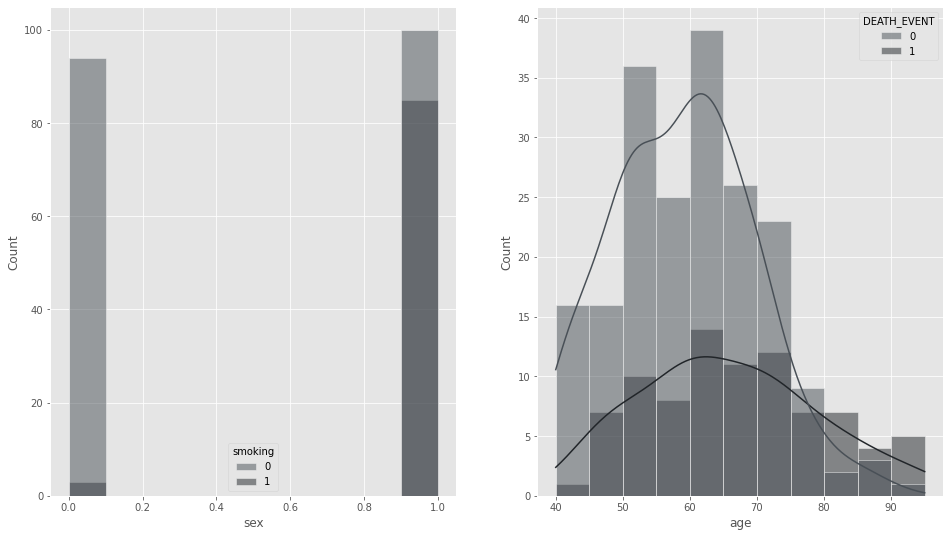

In [15]:
# Draw the plots for the most highest correlated pairs.
fig, axes = plt.subplots(1, 2)
sns.histplot(df, x="sex", hue="smoking", ax=axes[0]);
sns.histplot(df, x="age", hue="DEATH_EVENT", kde=True, bins=11, ax=axes[1]);

#### — Sex

Let's try to examine on how the risk factors  are distributed across the gender of patient which will be crucial during the process of data synthesis.

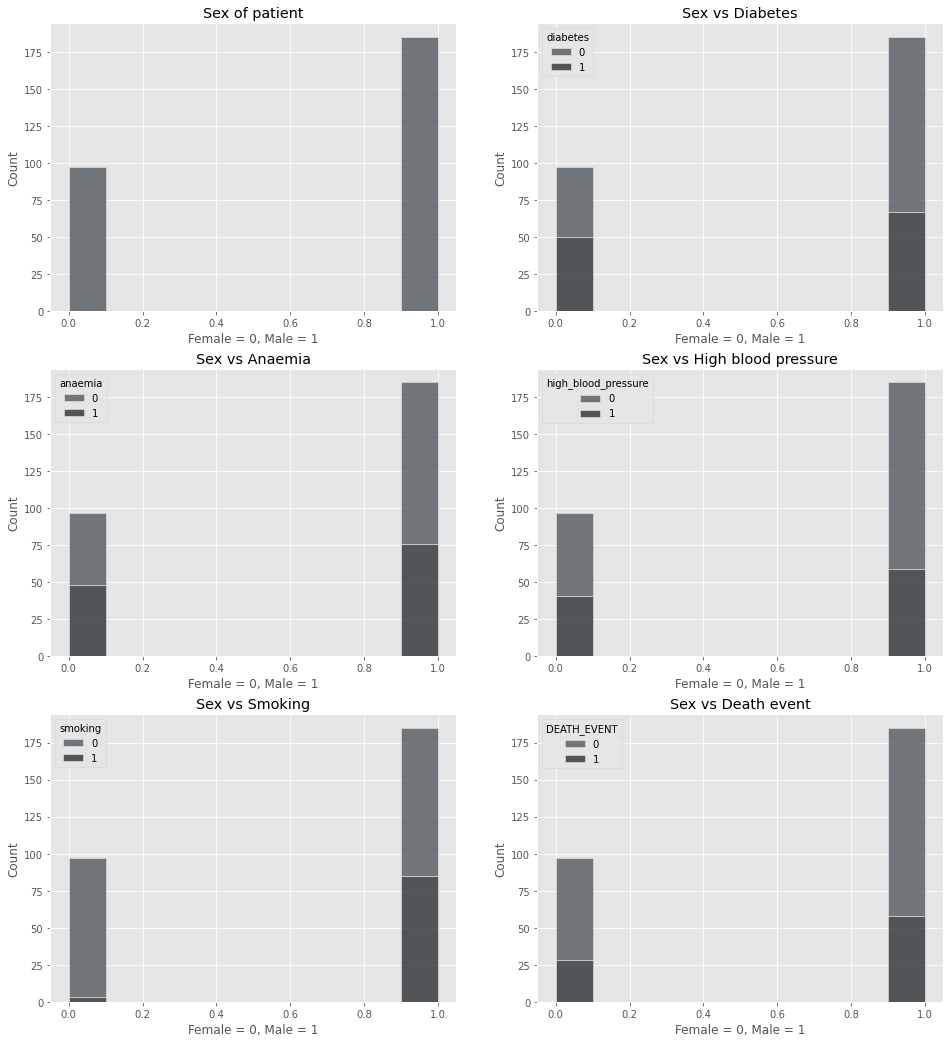

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(16,18))
sns.histplot(df, x="sex", ax=axes[0,0]).set(title='Sex of patient', xlabel="Female = 0, Male = 1");
sns.histplot(df, x="sex", hue="diabetes", multiple="stack", ax=axes[0,1]).set(title='Sex vs Diabetes', xlabel="Female = 0, Male = 1");
sns.histplot(df, x="sex", hue="anaemia", multiple="stack", ax=axes[1,0]).set(title='Sex vs Anaemia', xlabel="Female = 0, Male = 1");
sns.histplot(df, x="sex", hue="high_blood_pressure", multiple="stack", ax=axes[1,1]).set(title='Sex vs High blood pressure', xlabel="Female = 0, Male = 1");
sns.histplot(df, x="sex", hue="smoking", multiple="stack", ax=axes[2,0]).set(title='Sex vs Smoking', xlabel="Female = 0, Male = 1");
sns.histplot(df, x="sex", hue="DEATH_EVENT", multiple="stack", ax=axes[2,1]).set(title='Sex vs Death event', xlabel="Female = 0, Male = 1");

#### — Risk Factors

Proportion of sex in dataset distributes roughly 66% to 34% in favour of men. There is a significant disproportion between smokers of both sexes. Only 3.1% of female are smokers compared to 45.9% of men.

Rest of risk factors are much less varied between both sexes and they are better in favour of male. They have lower coefficients of diabetes, anaemia and high blood pressure. 


In [17]:
# Let's have a look at proportion of risk factors according to sex.
# Count gender of patients.
m, f = df['sex'].value_counts()
# p - convert to procentage, l - length of dataset
p = 100
l = len(df['sex'])

# sex of patient.
print('\n— Sex: Female: {:.0f}% ({}) | Male: {:.0f}% ({})\n'.format((f/l)*p, f, (m/l)*p, m))

# Smokers per sex.
fs = len(df[(df['sex'] == 0) & (df['smoking'] == 1)])
ms = len(df[(df['sex'] == 1) & (df['smoking'] == 1)])
print('— Smokers: Female: {:.1f}% | Male: {:.1f}%\n'.format((fs/f)*p, (ms/m)*p))

# Diabetes per sex.
fd = len(df[(df['sex'] == 0) & (df['diabetes'] == 1)])
md = len(df[(df['sex'] == 1) & (df['diabetes'] == 1)])
print('— Diabetes: Female: {:.1f}% | Male: {:.1f}%\n'.format((fd/f)*p, (md/m)*p))

# Anaemia per sex.
fa = len(df[(df['sex'] == 0) & (df['anaemia'] == 1)])
ma = len(df[(df['sex'] == 1) & (df['anaemia'] == 1)])
print('— Anaemia: Female: {:.1f}% | Male: {:.1f}%\n'.format((fa/f)*p, (ma/m)*p))

# High blood pressure per sex.
fhbp = len(df[(df['sex'] == 0) & (df['high_blood_pressure'] == 1)])
mhbp = len(df[(df['sex'] == 1) & (df['high_blood_pressure'] == 1)])
print('— High blood pressure: Female: {:.1f}% | Male: {:.1f}%\n'.format((fhbp/f)*p, (mhbp/m)*p))

# Death event per sex.
fde = len(df[(df['sex'] == 0) & (df['DEATH_EVENT'] == 1)])
mde = len(df[(df['sex'] == 1) & (df['DEATH_EVENT'] == 1)])
print('— Death event: Female: {:.1f}% | Male: {:.1f}%'.format((fde/f)*p, (mde/m)*p))


— Sex: Female: 34% (97) | Male: 66% (185)

— Smokers: Female: 3.1% | Male: 45.9%

— Diabetes: Female: 51.5% | Male: 36.2%

— Anaemia: Female: 49.5% | Male: 41.1%

— High blood pressure: Female: 42.3% | Male: 31.9%

— Death event: Female: 28.9% | Male: 31.4%


Researched data above based on the risk factors according to sex will be used as an assumptions in data synthesis process. 

#### — Distribution

Distribution above features look slightly skewed but this can be determined by running normality test.

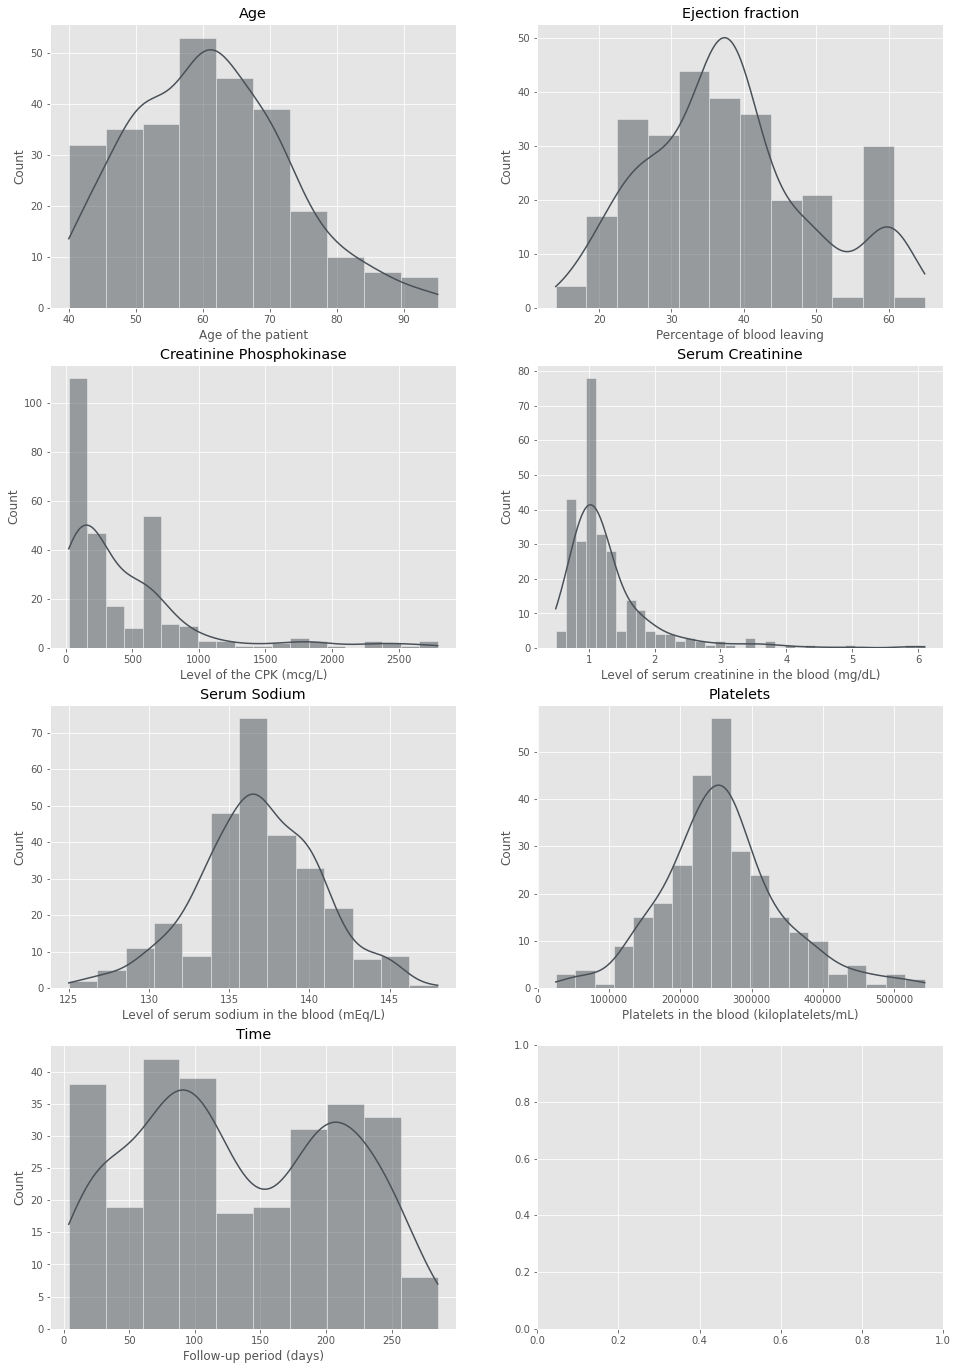

In [18]:
# Draw histograms for the features that contains measurement values.
fig, axes = plt.subplots(4, 2, figsize=(16,24))
sns.histplot(df['age'], kde=True, ax=axes[0,0]).set(title='Age', xlabel="Age of the patient");
sns.histplot(df['ejection_fraction'], kde=True, ax=axes[0,1]).set(title='Ejection fraction', xlabel="Percentage of blood leaving");
sns.histplot(df['creatinine_phosphokinase'], kde=True, ax=axes[1,0]).set(title='Creatinine Phosphokinase', xlabel="Level of the CPK (mcg/L)");
sns.histplot(df['serum_creatinine'], kde=True, ax=axes[1,1]).set(title='Serum Creatinine', xlabel="Level of serum creatinine in the blood (mg/dL)");
sns.histplot(df['serum_sodium'], kde=True, ax=axes[2,0]).set(title='Serum Sodium', xlabel="Level of serum sodium in the blood (mEq/L)");
sns.histplot(df['platelets'], kde=True, ax=axes[2,1]).set(title='Platelets', xlabel="Platelets in the blood (kiloplatelets/mL)");
sns.histplot(df['time'], kde=True, ax=axes[3,0]).set(title='Time', xlabel="Follow-up period (days)");

In [19]:
# Determine if any of the features that contains measurement values have normal distribution 
# by using D'Agostino's normality test.

# Columns of features that contain measurement values
columns = df.iloc[:,[0,2,4,6,7,8,11]] 

for column in columns:
    stat, p = ss.normaltest(df[column])
    print('— '+ column.capitalize())
    print('Statistics={:.3f}, p={:.3f}'.format(stat, p))

    # Set a treshold for a correctly assumed hypothesis.
    alpha = 0.05

    # Evaluation
    if p > alpha:
        print('Samples fall into normal distribution (fail to reject H0)\n')
    else:
        print('Samples do not fall into normal distribution (reject H0)\n')

— Age
Statistics=7.814, p=0.020
Samples do not fall into normal distribution (reject H0)

— Creatinine_phosphokinase
Statistics=147.969, p=0.000
Samples do not fall into normal distribution (reject H0)

— Ejection_fraction
Statistics=9.684, p=0.008
Samples do not fall into normal distribution (reject H0)

— Platelets
Statistics=16.466, p=0.000
Samples do not fall into normal distribution (reject H0)

— Serum_creatinine
Statistics=213.816, p=0.000
Samples do not fall into normal distribution (reject H0)

— Serum_sodium
Statistics=1.903, p=0.386
Samples fall into normal distribution (fail to reject H0)

— Time
Statistics=187.178, p=0.000
Samples do not fall into normal distribution (reject H0)



Running above test on selected features clearly rejected thesis on most of them and only serum sodium falls in normal distribution. Let's try to find approximate distribution for rest of those features.

In [20]:
# Performing a kolmogorov-smirnov goodness-of-fit test on all fitted distributions to pick one that will be the closest
# Adopted from https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed
# Prints the best fitted distribution.

# list of distributions.
distribution = ['beta','chi2','expon', 'f', 'gamma','gumbel_r',
                 'gumbel_l','laplace','logistic','lognorm','norm','pareto','powerlaw','rayleigh',
                 't','triang','uniform','vonmises','wald','weibull_min']

for column in columns:
    results = []
    for i in distribution:
        # Assign distribution from list.
        dist = getattr(ss, i)
        # Fit the data.
        param = dist.fit(df[column])
        # Perform Kolmogorov-Smirnov Goodness of Fit Test.
        a = ss.kstest(df[column], i, args=param)
        # Append to list.
        results.append((i,a[0],a[1]))
        
    print('\n— '+ column.capitalize())
    # Sort the list on highest p-value. 
    results.sort(key=lambda x:float(x[2]), reverse=True)
    for j in results[:3]:
        print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

c:\users\izydom\documents\gmit\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu



— Age
logistic: statistic=0.06609998088714217, pvalue=0.16264723255335467
t: statistic=0.06678551738653038, pvalue=0.1544331743248456
norm: statistic=0.0667883285865104, pvalue=0.1544001865645911


c:\users\izydom\documents\gmit\venv\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\users\izydom\documents\gmit\venv\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



— Creatinine_phosphokinase
gamma: statistic=0.08557299045357336, pvalue=0.030272640722051714
beta: statistic=0.09375381202637245, pvalue=0.013131509625819066
weibull_min: statistic=0.10764849438539115, pvalue=0.0026682108019994988

— Ejection_fraction
lognorm: statistic=0.12428241436014742, pvalue=0.0002960698082703284
chi2: statistic=0.1243552333176714, pvalue=0.0002930290275748132
gamma: statistic=0.12435548034136001, pvalue=0.0002930187626266963

— Platelets
logistic: statistic=0.05676704694994583, pvalue=0.31165483390766646
laplace: statistic=0.06149835501434747, pvalue=0.22706628869503365
lognorm: statistic=0.0690653657405077, pvalue=0.12947894137129068

— Serum_creatinine
f: statistic=0.1019623556680076, pvalue=0.005260531701885105
lognorm: statistic=0.11891878134262635, pvalue=0.0006228033017604058
t: statistic=0.1313707322879204, pvalue=0.00010532379185458617

— Serum_sodium
logistic: statistic=0.07543444544418576, pvalue=0.07667659921864856
weibull_min: statistic=0.0859534415

In [21]:
# Finding on best fitted distribution with giving the parameters for the best fit.
# Adopted from https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3

def get_best_distribution(data):
    dist_names = ['beta','chi2','expon', 'f', 'gamma','gumbel_r',
                 'gumbel_l','laplace','logistic','lognorm','norm','pareto','powerlaw','rayleigh',
                 't','triang','uniform','vonmises','wald','weibull_min','weibull_max' ]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(ss, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = ss.kstest(data, dist_name, args=param)
        #print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))
    
    return best_dist, best_p, params[best_dist]

for column in columns:
    name = column
    column = df[column].to_numpy()
    
    print('\n' + name)
    get_best_distribution(column)


age
Best fitting distribution: logistic
Best p value: 0.16264723255335467
Parameters for the best fit: (60.60250478662493, 6.731264844710283)

creatinine_phosphokinase
Best fitting distribution: gamma
Best p value: 0.030272640722051714
Parameters for the best fit: (0.8023864393434244, 22.999999999999996, 551.828882112633)

ejection_fraction
Best fitting distribution: lognorm
Best p value: 0.0002960698082703284
Parameters for the best fit: (0.19246499977838138, -21.05871349870648, 57.869882822085536)

platelets
Best fitting distribution: logistic
Best p value: 0.31165483390766646
Parameters for the best fit: (254813.60989068105, 46328.45963226569)

serum_creatinine
Best fitting distribution: f
Best p value: 0.005260531701885105
Parameters for the best fit: (3155.4334152651845, 7.702100060349803, 0.32706856704521914, 0.7247913763556642)

serum_sodium
Best fitting distribution: logistic
Best p value: 0.07667659921864856
Parameters for the best fit: (136.85412398579368, 2.174602599086054)

#### — 4. Data Synthesis

##### — Sex 

In [22]:
# Start first with recreating sex columns.

p = 100 

# size of df.
size = 282

#setting the random generator so results can be reproduced
rng = np.random.default_rng(5)

values = [0,1] # Female = 0, Male = 1

# The percentage distribution of genders.
sex = rng.choice(values, size, p=[0.34, 0.66])

# Add column to data frame.
df_sample = pd.DataFrame(data=sex, columns=['sex'])

# Count occurrences of both genders.
m, f = df_sample['sex'].value_counts()

df_sample.T

,0,1,2,3,4,5,6,7,8,9,...,272,273,274,275,276,277,278,279,280,281
sex,1,1,1,0,0,1,1,0,0,1,...,1,1,1,1,1,1,0,0,1,1


In [23]:
# sex of patient.
print('\n— Sex: Female: {:d} | Male: {:d}\n'.format(f, m))


— Sex: Female: 96 | Male: 186



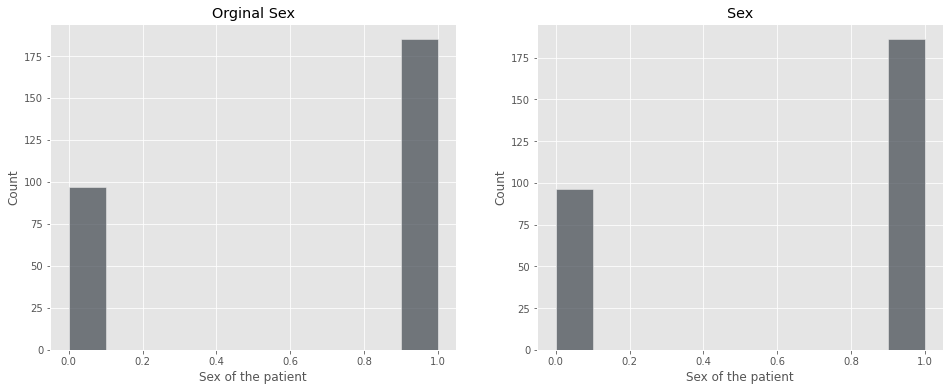

In [24]:
# Distribution of patients.
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.histplot(data=df, x="sex", ax=axes[0]).set(title='Orginal Sex', xlabel="Sex of the patient");
sns.histplot(data=df_sample, x="sex", ax=axes[1]).set(title='Sex', xlabel="Sex of the patient");

##### — Smoking 

In [25]:
# Smoking column.
smokers = [0,1]
fs = rng.choice(smokers, f, p=[0.969, 0.031])
ms = rng.choice(smokers, m, p=[0.541, 0.459])

#setting the random generator so results can be reproduced
rng = np.random.default_rng(9)

# Function that generates a random sample from smokers array including sex and their percentage of smokers.
def smoking(row):
   if row['sex'] == 0:
      return int(rng.choice(smokers, 1, p=[0.969, 0.031]))
   if row['sex'] == 1:
      return int(rng.choice(smokers, 1, p=[0.541, 0.459]))

# Add column to data frame.
df_sample['smoking'] = df_sample.apply(lambda row: smoking(row), axis=1)
df_sample.T

,0,1,2,3,4,5,6,7,8,9,...,272,273,274,275,276,277,278,279,280,281
sex,1,1,1,0,0,1,1,0,0,1,...,1,1,1,1,1,1,0,0,1,1
smoking,1,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [26]:
(df_sample[(df_sample['sex'] == 0) & (df_sample['smoking'] == 1)]).value_counts()

sex  smoking
0    1          3
dtype: int64

In [27]:
# Smokers per sex.
fs = len(df_sample[(df_sample['sex'] == 0) & (df_sample['smoking'] == 1)])
ms = len(df_sample[(df_sample['sex'] == 1) & (df_sample['smoking'] == 1)])
print('— Smokers: Female: {:.1f}% | Male: {:.1f}%\n'.format((fs/f)*p, (ms/m)*p))

— Smokers: Female: 3.1% | Male: 48.9%



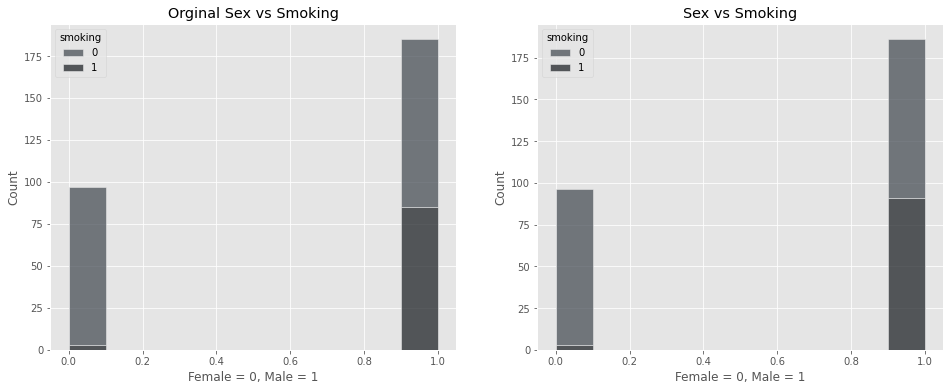

In [28]:
# Distribution of smokers.
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.histplot(df, x="sex", hue="smoking", multiple="stack", ax=axes[0]).set(title='Orginal Sex vs Smoking', xlabel="Female = 0, Male = 1");
sns.histplot(df_sample, x="sex", hue="smoking", multiple="stack", ax=axes[1]).set(title='Sex vs Smoking', xlabel="Female = 0, Male = 1");

##### — Diabetes 

In [29]:
# Diabetes column.
fd = rng.choice(values, 1, p=[0.485, 0.515])
md = rng.choice(values, 1, p=[0.638, 0.362])

#setting the random generator so results can be reproduced
rng = np.random.default_rng(3)

# Function that generates a random sample from diabetes array including sex and their percentage of smokers.
def diabetes(row):
   if row['sex'] == 0:
      return int(rng.choice(values, 1, p=[0.485, 0.515]))
   if row['sex'] == 1:
      return int(rng.choice(values, 1, p=[0.638, 0.362]))

df_sample['diabetes'] = df_sample.apply(lambda row: diabetes(row), axis=1)
df_sample.T

,0,1,2,3,4,5,6,7,8,9,...,272,273,274,275,276,277,278,279,280,281
sex,1,1,1,0,0,1,1,0,0,1,...,1,1,1,1,1,1,0,0,1,1
smoking,1,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
diabetes,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,1


In [30]:
# Diabetes per sex.
fd = len(df_sample[(df_sample['sex'] == 0) & (df_sample['diabetes'] == 1)])
md = len(df_sample[(df_sample['sex'] == 1) & (df_sample['diabetes'] == 1)])
print('— Diabetes: Female: {:.1f}% | Male: {:.1f}%\n'.format((fd/f)*p, (md/m)*p))

— Diabetes: Female: 54.2% | Male: 38.2%



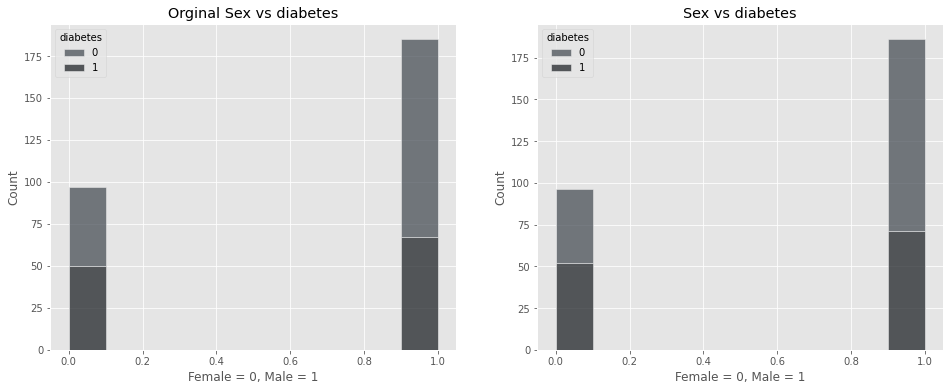

In [31]:
# Distribution of diabetes.
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.histplot(df, x="sex", hue="diabetes", multiple="stack", ax=axes[0]).set(title='Orginal Sex vs diabetes', xlabel="Female = 0, Male = 1");
sns.histplot(df_sample, x="sex", hue="diabetes", multiple="stack", ax=axes[1]).set(title='Sex vs diabetes', xlabel="Female = 0, Male = 1");

##### — Anaemia 

In [32]:
# Anaemia column.

#setting the random generator so results can be reproduced
rng = np.random.default_rng(3)

# Function that generates a random sample from diabetes array including sex and their percentage of smokers.
def anaemia(row):
   if row['sex'] == 0:
      return int(rng.choice(values, 1, p=[0.505, 0.495]))
   if row['sex'] == 1:
      return int(rng.choice(values, 1, p=[0.589, 0.411]))

df_sample['anaemia'] = df_sample.apply(lambda row: anaemia(row), axis=1)
df_sample.T

,0,1,2,3,4,5,6,7,8,9,...,272,273,274,275,276,277,278,279,280,281
sex,1,1,1,0,0,1,1,0,0,1,...,1,1,1,1,1,1,0,0,1,1
smoking,1,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
diabetes,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,1
anaemia,0,0,1,1,0,0,0,0,1,0,...,1,0,1,0,0,0,1,1,0,1


In [33]:
# Anaemia per sex.
fa = len(df_sample[(df_sample['sex'] == 0) & (df_sample['anaemia'] == 1)])
ma = len(df_sample[(df_sample['sex'] == 1) & (df_sample['anaemia'] == 1)])
print('— Anaemia: Female: {:.1f}% | Male: {:.1f}%\n'.format((fa/f)*p, (ma/m)*p))

— Anaemia: Female: 53.1% | Male: 40.9%



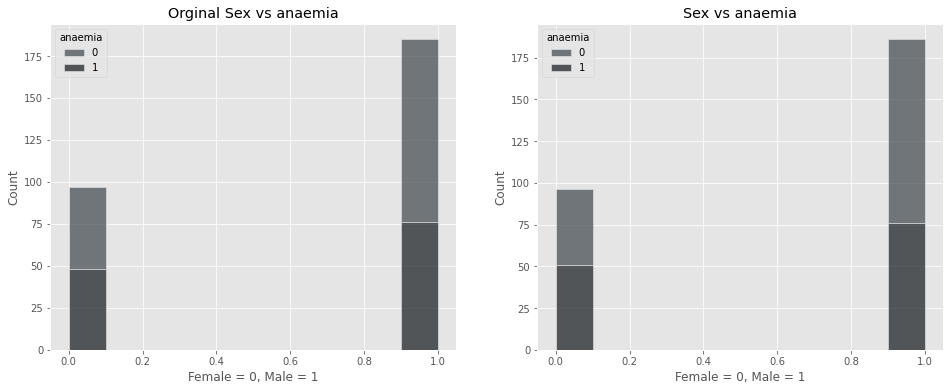

In [34]:
# Distribution of anaemia.
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.histplot(df, x="sex", hue="anaemia", multiple="stack", ax=axes[0]).set(title='Orginal Sex vs anaemia', xlabel="Female = 0, Male = 1");
sns.histplot(df_sample, x="sex", hue="anaemia", multiple="stack", ax=axes[1]).set(title='Sex vs anaemia', xlabel="Female = 0, Male = 1");

##### — High blood pressure 

In [35]:
# High blood pressure column.

#setting the random generator so results can be reproduced
rng = np.random.default_rng(3)

# Function that generates a random sample from diabetes array including sex and their percentage of smokers.
def high_blood_pressure(row):
   if row['sex'] == 0:
      return int(rng.choice(values, 1, p=[0.577, 0.423]))
   if row['sex'] == 1:
      return int(rng.choice(values, 1, p=[0.681, 0.319]))

df_sample['high_blood_pressure'] = df_sample.apply(lambda row: high_blood_pressure(row), axis=1)
df_sample.T

,0,1,2,3,4,5,6,7,8,9,...,272,273,274,275,276,277,278,279,280,281
sex,1,1,1,0,0,1,1,0,0,1,...,1,1,1,1,1,1,0,0,1,1
smoking,1,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
diabetes,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,1
anaemia,0,0,1,1,0,0,0,0,1,0,...,1,0,1,0,0,0,1,1,0,1
high_blood_pressure,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0


In [36]:
# High blood pressure per sex.
fhbp = len(df_sample[(df_sample['sex'] == 0) & (df_sample['high_blood_pressure'] == 1)])
mhbp = len(df_sample[(df_sample['sex'] == 1) & (df_sample['high_blood_pressure'] == 1)])
print('— High blood pressure: Female: {:.1f}% | Male: {:.1f}%\n'.format((fhbp/f)*p, (mhbp/m)*p))

— High blood pressure: Female: 45.8% | Male: 30.1%



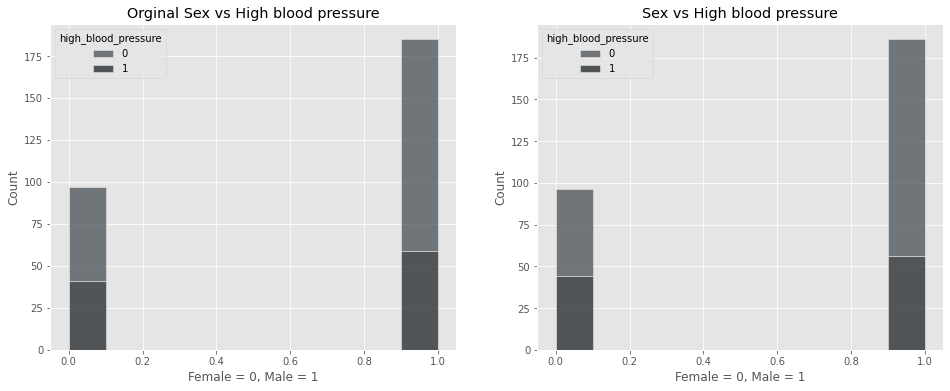

In [37]:
# Distribution of High blood pressure.
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.histplot(df, x="sex", hue="high_blood_pressure", multiple="stack", ax=axes[0]).set(title='Orginal Sex vs High blood pressure', xlabel="Female = 0, Male = 1");
sns.histplot(df_sample, x="sex", hue="high_blood_pressure", multiple="stack", ax=axes[1]).set(title='Sex vs High blood pressure', xlabel="Female = 0, Male = 1");

##### — Death event 

In [38]:
# Death event column.

#setting the random generator so results can be reproduced
rng = np.random.default_rng(3)

# Function that generates a random sample from diabetes array including sex and their percentage of smokers.
def death_event(row):
   if row['sex'] == 0:
      return int(rng.choice(values, 1, p=[0.711, 0.289]))
   if row['sex'] == 1:
      return int(rng.choice(values, 1, p=[0.686, 0.314]))

df_sample['death_event'] = df_sample.apply(lambda row: death_event(row), axis=1)
df_sample.T

,0,1,2,3,4,5,6,7,8,9,...,272,273,274,275,276,277,278,279,280,281
sex,1,1,1,0,0,1,1,0,0,1,...,1,1,1,1,1,1,0,0,1,1
smoking,1,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
diabetes,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,1
anaemia,0,0,1,1,0,0,0,0,1,0,...,1,0,1,0,0,0,1,1,0,1
high_blood_pressure,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
death_event,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0


In [39]:
# Death event per sex.
fde = len(df_sample[(df_sample['sex'] == 0) & (df_sample['death_event'] == 1)])
mde = len(df_sample[(df_sample['sex'] == 1) & (df_sample['death_event'] == 1)])
print('— Death event: Female: {:.1f}% | Male: {:.1f}%\n'.format((fde/f)*p, (mde/m)*p))

— Death event: Female: 28.1% | Male: 29.6%



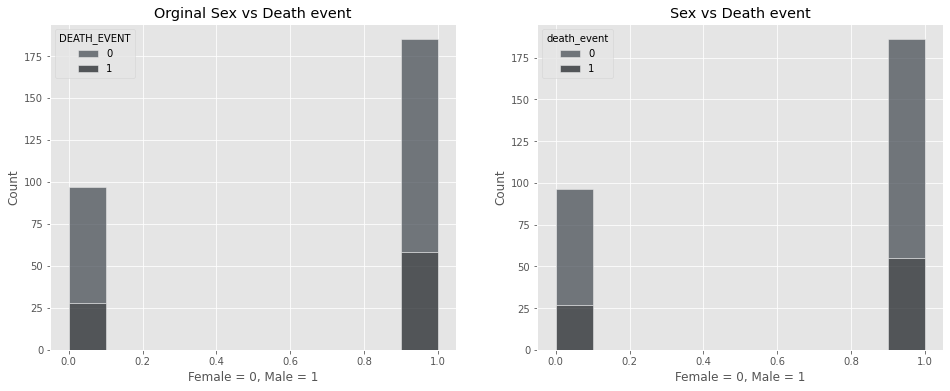

In [40]:
# Distribution of Death event.
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.histplot(df, x="sex", hue="DEATH_EVENT", multiple="stack", ax=axes[0]).set(title='Orginal Sex vs Death event', xlabel="Female = 0, Male = 1");
sns.histplot(df_sample, x="sex", hue="death_event", multiple="stack", ax=axes[1]).set(title='Sex vs Death event', xlabel="Female = 0, Male = 1");

##### — Age 

In [41]:
# function that takes f as a distribution, loc, scale and lb & rb - left & right bounds.

size = 282 

def bounds(f, *params, lb, rb, t): 
    #setting the random generator so results can be reproduced
    rng = np.random.default_rng(7)
    l = []
    # Returns the value of the named attribute of an object
    dist = getattr(rng, f)
    # loop while it reach data frame size | 299
    while len(l) != size:
        # Draw samples of distribution.
        n = dist(loc, scale, 1).astype(t)
        # check according to set boundaries.
        if (n > lb and n < rb):
            # Append to list.
            l.append(t(n))
        else:
            # otherwise skip 
            continue
    # Return the list.
    return l

In [42]:
# Age feature parameters.
loc, scale = 60.60250478662493, 6.731264844710283

# Add column of the distribution that draw samples using bounds function.
df_sample['age'] = pd.DataFrame(bounds('logistic',loc, scale,lb=40,rb=95, t=int))
df_sample

,sex,smoking,diabetes,anaemia,high_blood_pressure,death_event,age
0,1,1,0,0,0,0,64
1,1,0,0,0,0,0,75
2,1,1,1,1,1,1,68
3,0,0,1,1,1,0,52
4,0,0,0,0,0,0,54
...,...,...,...,...,...,...,...
277,1,1,0,0,0,0,69
278,0,0,1,1,1,1,57
279,0,0,1,1,1,1,64
280,1,0,0,0,0,0,50


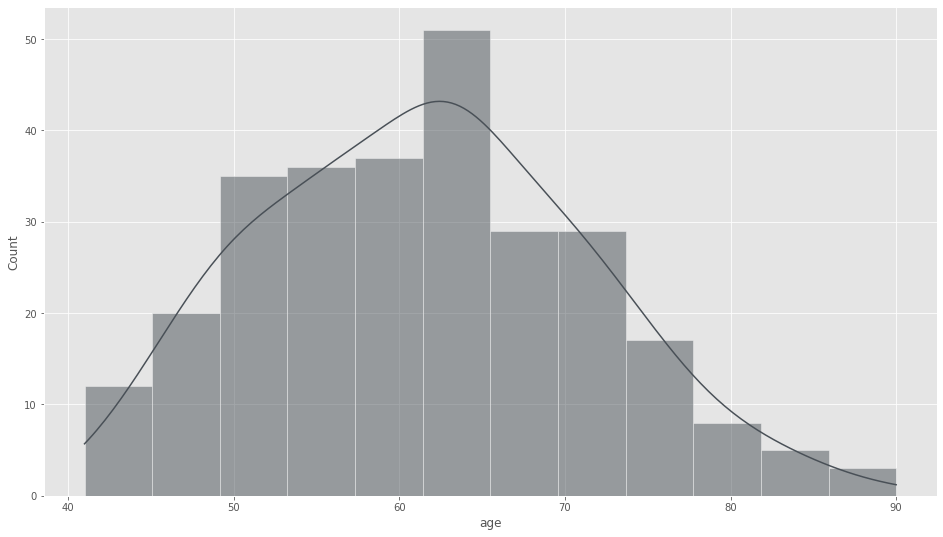

In [43]:
sns.histplot(df_sample['age'], kde=True);

c:\users\izydom\documents\gmit\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\izydom\documents\gmit\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


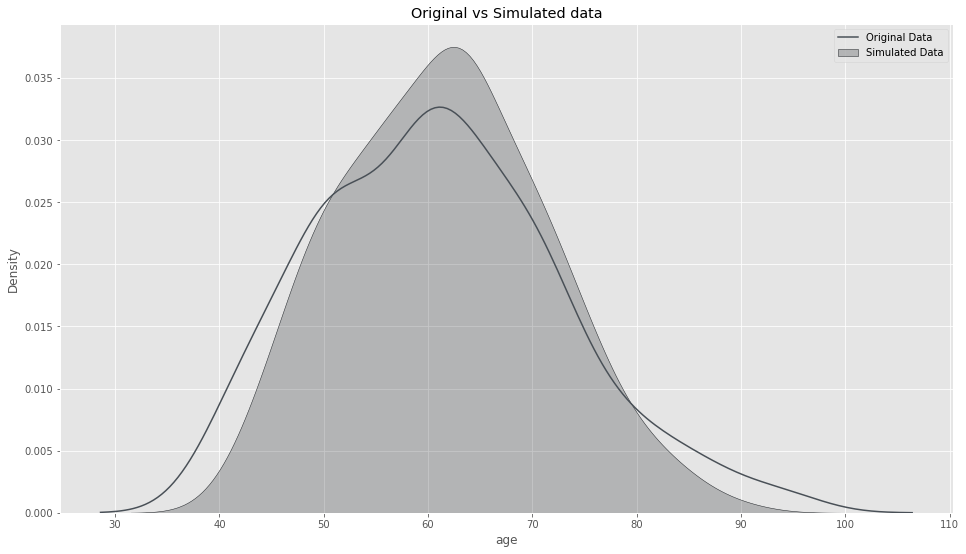

In [44]:
# Compare original vs simulated data
sns.distplot(df['age'],hist=False, label='Original Data').set(title='Original vs Simulated data');
sns.distplot(df_sample['age'],hist=False,kde_kws={"shade": True}, label ='Simulated Data');
plt.legend();

##### — Serum sodium 

In [45]:
# Serum sodium feature parameters. 
loc, scale = 136.27304964539007, 3.930231607284364 

df_sample['serum_sodium'] = pd.DataFrame(bounds('normal',loc, scale, lb=125,rb=148, t=int))
df_sample

,sex,smoking,diabetes,anaemia,high_blood_pressure,death_event,age,serum_sodium
0,1,1,0,0,0,0,64,136
1,1,0,0,0,0,0,75,137
2,1,1,1,1,1,1,68,135
3,0,0,1,1,1,0,52,132
4,0,0,0,0,0,0,54,134
...,...,...,...,...,...,...,...,...
277,1,1,0,0,0,0,69,137
278,0,0,1,1,1,1,57,136
279,0,0,1,1,1,1,64,136
280,1,0,0,0,0,0,50,132


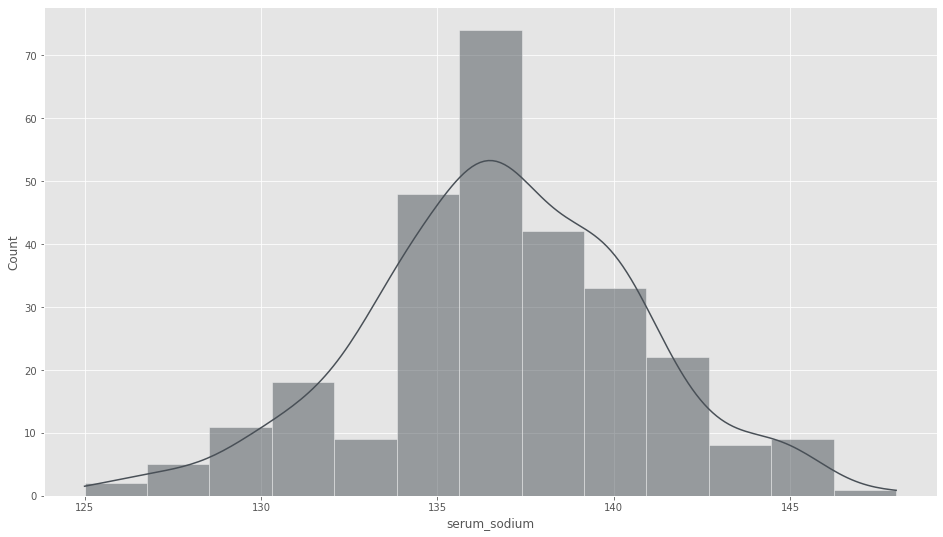

In [46]:
sns.histplot(df['serum_sodium'], kde=True);

c:\users\izydom\documents\gmit\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\izydom\documents\gmit\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


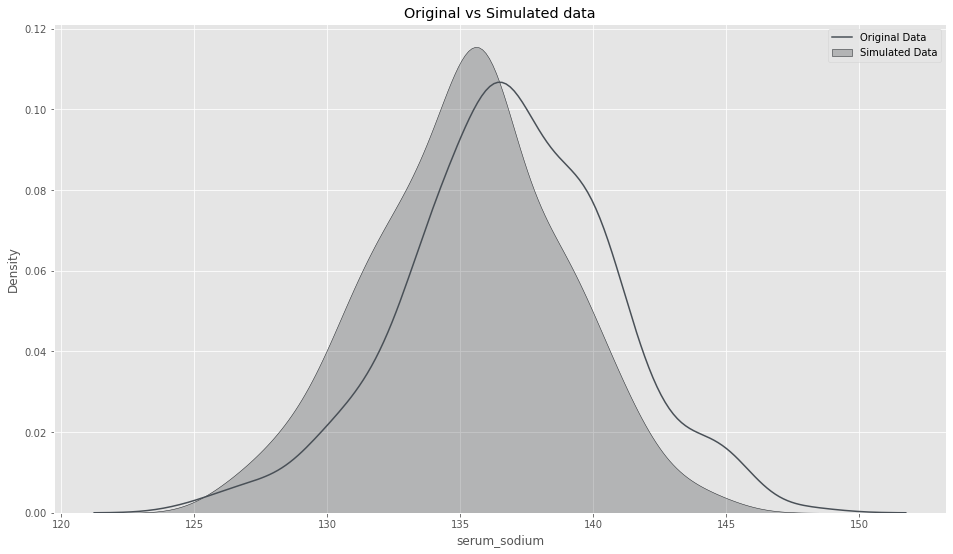

In [47]:
# Compare original vs simulated data
sns.distplot(df['serum_sodium'],hist=False, label='Original Data').set(title='Original vs Simulated data');
sns.distplot(df_sample['serum_sodium'],hist=False,kde_kws={"shade": True}, label ='Simulated Data');
plt.legend();

##### — Platelets 

In [48]:
# Platelets feature parameters. 
loc, scale = 254813.60989068105, 46328.45963226569

df_sample['platelets'] = pd.DataFrame(bounds('logistic',loc, scale, lb=25.01,rb=600000, t=int))
df_sample

,sex,smoking,diabetes,anaemia,high_blood_pressure,death_event,age,serum_sodium,platelets
0,1,1,0,0,0,0,64,136,278498
1,1,0,0,0,0,0,75,137,355190
2,1,1,1,1,1,1,68,135,312293
3,0,0,1,1,1,0,52,132,197571
4,0,0,0,0,0,0,54,134,215596
...,...,...,...,...,...,...,...,...,...
277,1,1,0,0,0,0,69,137,312503
278,0,0,1,1,1,1,57,136,326896
279,0,0,1,1,1,1,64,136,288505
280,1,0,0,0,0,0,50,132,230302


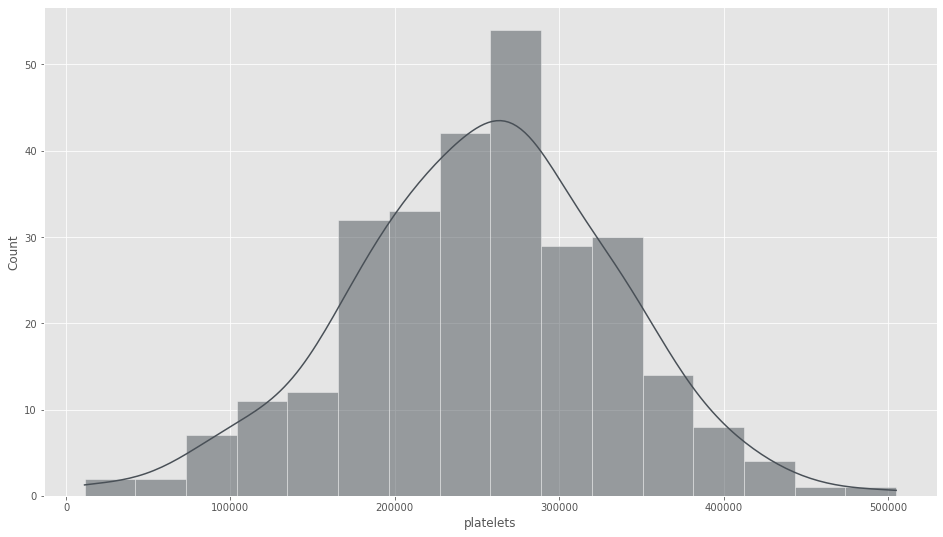

In [49]:
sns.histplot(df_sample['platelets'], kde=True);

c:\users\izydom\documents\gmit\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\izydom\documents\gmit\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


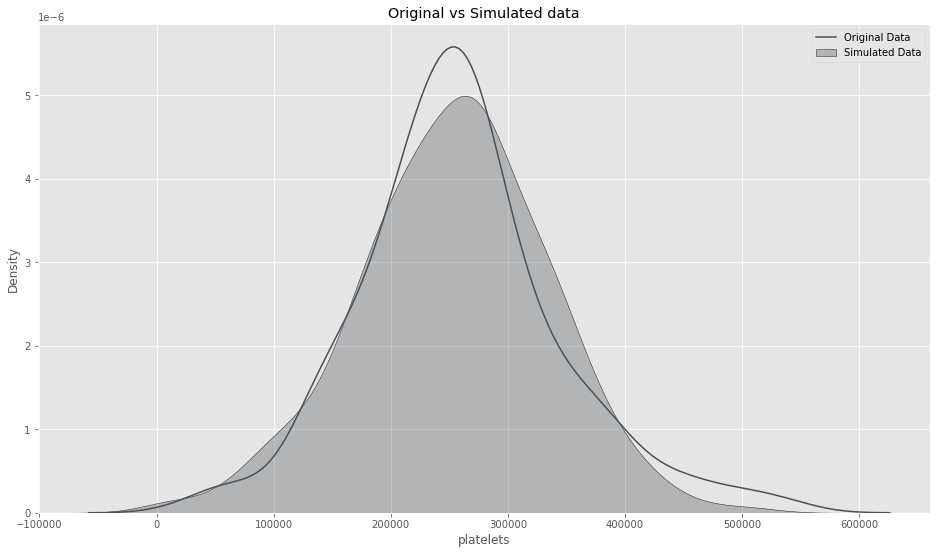

In [50]:
# Compare original vs simulated data
sns.distplot(df['platelets'],hist=False, label='Original Data').set(title='Original vs Simulated data');
sns.distplot(df_sample['platelets'],hist=False,kde_kws={"shade": True}, label ='Simulated Data');
plt.legend();

##### — Ejection Fraction 

In [51]:
# Ejection Fraction feature parameters.
loc, scale = 38.083612, 11.834841

df_sample['ejection_fraction'] = pd.DataFrame(bounds('lognormal',loc, scale, lb=14,rb=80, t=int))
df_sample

,sex,smoking,diabetes,anaemia,high_blood_pressure,death_event,age,serum_sodium,platelets,ejection_fraction
0,1,1,0,0,0,0,64,136,278498,18
1,1,0,0,0,0,0,75,137,355190,48
2,1,1,1,1,1,1,68,135,312293,71
3,0,0,1,1,1,0,52,132,197571,20
4,0,0,0,0,0,0,54,134,215596,22
...,...,...,...,...,...,...,...,...,...,...
277,1,1,0,0,0,0,69,137,312503,17
278,0,0,1,1,1,1,57,136,326896,19
279,0,0,1,1,1,1,64,136,288505,27
280,1,0,0,0,0,0,50,132,230302,56


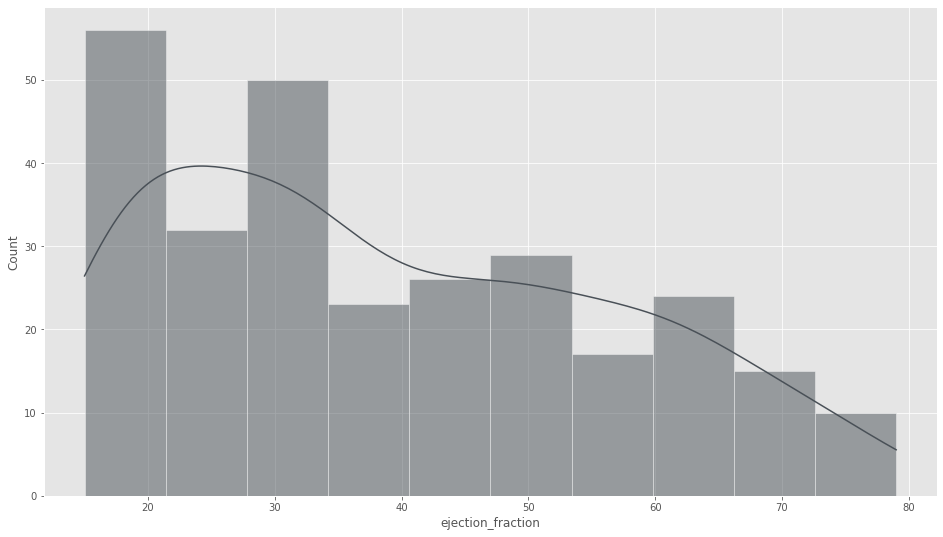

In [52]:
sns.histplot(df_sample['ejection_fraction'], kde=True);

c:\users\izydom\documents\gmit\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\izydom\documents\gmit\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


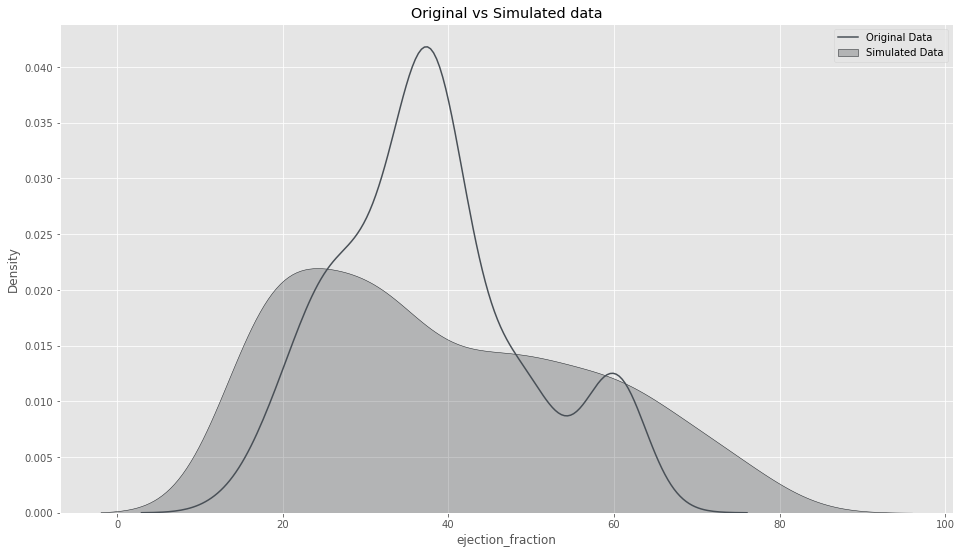

In [53]:
# Compare original vs simulated data
sns.distplot(df['ejection_fraction'],hist=False, label='Original Data').set(title='Original vs Simulated data');
sns.distplot(df_sample['ejection_fraction'],hist=False,kde_kws={"shade": True}, label ='Simulated Data');
plt.legend();

##### — Creatinine phosphokinase

In [54]:
# Creatinine phosphokinase feature parameters.
loc, scale = 299.0, 581.839465

df_sample['creatinine_phosphokinase'] = pd.DataFrame(bounds('lognormal',loc, scale, lb=23, rb=3000, t=int))
df_sample

,sex,smoking,diabetes,anaemia,high_blood_pressure,death_event,age,serum_sodium,platelets,ejection_fraction,creatinine_phosphokinase
0,1,1,0,0,0,0,64,136,278498,18,51
1,1,0,0,0,0,0,75,137,355190,48,31
2,1,1,1,1,1,1,68,135,312293,71,285
3,0,0,1,1,1,0,52,132,197571,20,1275
4,0,0,0,0,0,0,54,134,215596,22,27
...,...,...,...,...,...,...,...,...,...,...,...
277,1,1,0,0,0,0,69,137,312503,17,2347
278,0,0,1,1,1,1,57,136,326896,19,45
279,0,0,1,1,1,1,64,136,288505,27,353
280,1,0,0,0,0,0,50,132,230302,56,167


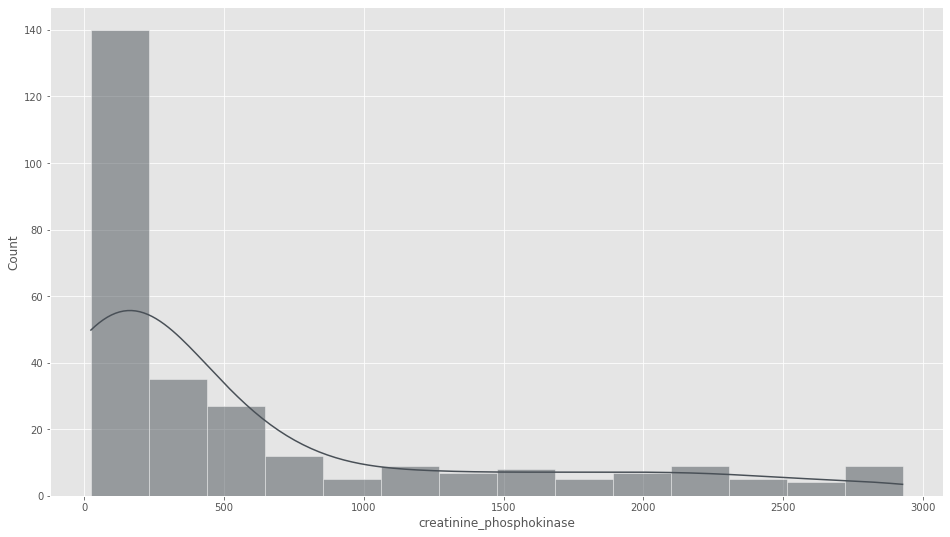

In [55]:
sns.histplot(df_sample['creatinine_phosphokinase'], kde=True);

c:\users\izydom\documents\gmit\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\izydom\documents\gmit\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


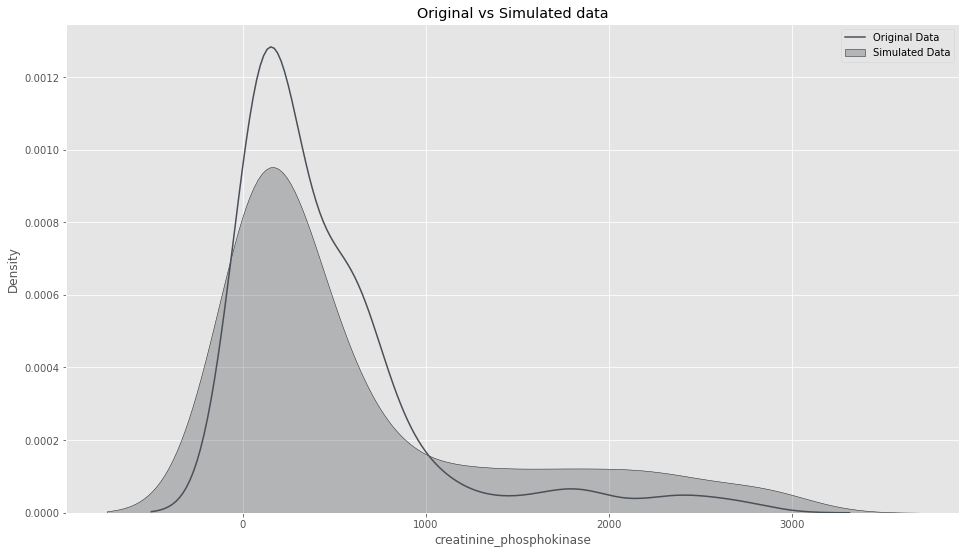

In [56]:
# Compare original vs simulated data
sns.distplot(df['creatinine_phosphokinase'],hist=False, label='Original Data').set(title='Original vs Simulated data');
sns.distplot(df_sample['creatinine_phosphokinase'],hist=False,kde_kws={"shade": True}, label ='Simulated Data');
plt.legend();

##### — Serum Creatinine

In [58]:
loc, scale = 0.6938048460511184, 0.46095750894958903

df_sample['serum_creatinine'] = pd.DataFrame(bounds('lognormal',loc, scale, lb=0.5,rb=7, t=float))
df_sample['serum_creatinine'] = df_sample['serum_creatinine'].round(2)
df_sample

,sex,smoking,diabetes,anaemia,high_blood_pressure,death_event,age,serum_sodium,platelets,ejection_fraction,creatinine_phosphokinase,serum_creatinine
0,1,1,0,0,0,0,64,136,278498,18,51,2.00
1,1,0,0,0,0,0,75,137,355190,48,31,2.30
2,1,1,1,1,1,1,68,135,312293,71,285,1.76
3,0,0,1,1,1,0,52,132,197571,20,1275,1.33
4,0,0,0,0,0,0,54,134,215596,22,27,1.62
...,...,...,...,...,...,...,...,...,...,...,...,...
277,1,1,0,0,0,0,69,137,312503,17,2347,2.25
278,0,0,1,1,1,1,57,136,326896,19,45,1.95
279,0,0,1,1,1,1,64,136,288505,27,353,2.08
280,1,0,0,0,0,0,50,132,230302,56,167,1.22


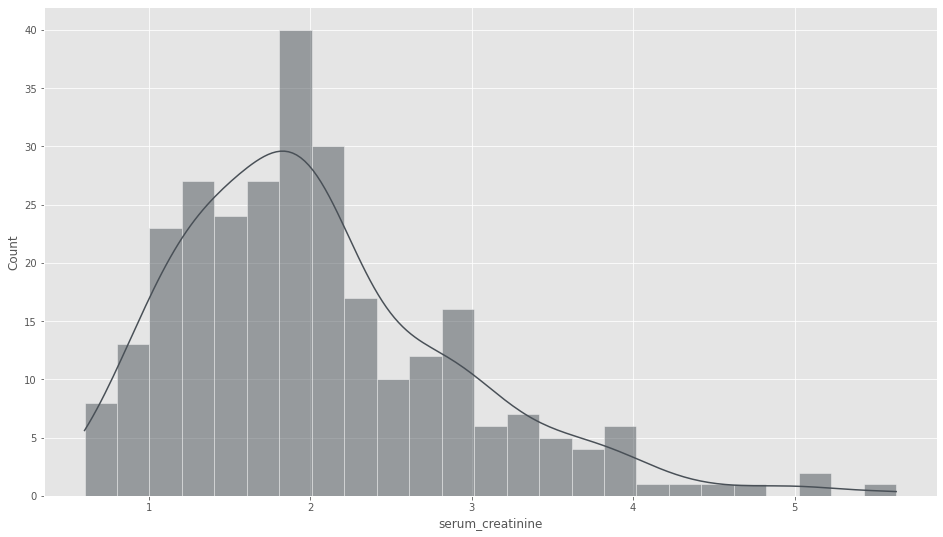

In [59]:
sns.histplot(df_sample['serum_creatinine'], bins=25, kde=True);

c:\users\izydom\documents\gmit\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\izydom\documents\gmit\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


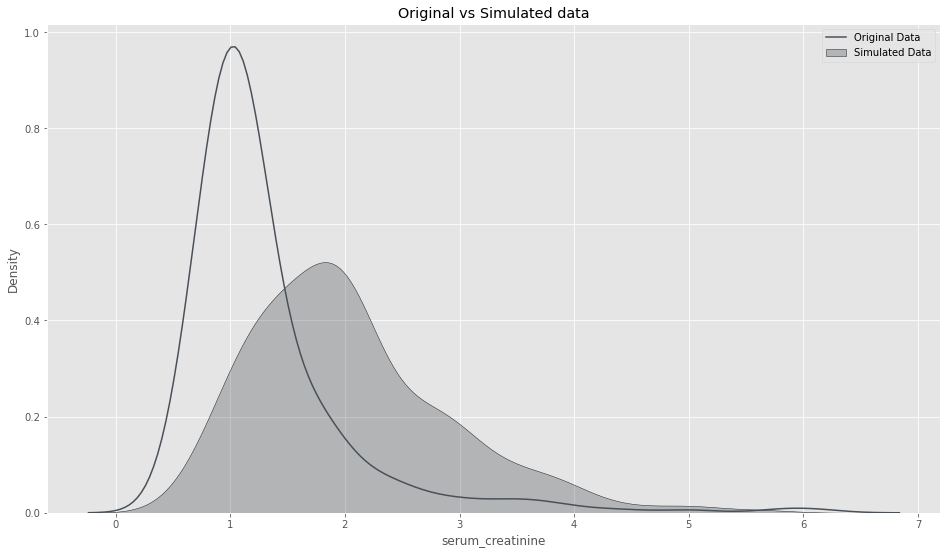

In [60]:
# Compare original vs simulated data
sns.distplot(df['serum_creatinine'],hist=False, label='Original Data').set(title='Original vs Simulated data');
sns.distplot(df_sample['serum_creatinine'],hist=False,kde_kws={"shade": True}, label ='Simulated Data');
plt.legend();

##### — Time

In [61]:
loc, scale = 128.13829787234042, 59.964516883287104

df_sample['time'] = pd.DataFrame(bounds('normal',loc, scale, lb=4,rb=285, t=int))
df_sample

,sex,smoking,diabetes,anaemia,high_blood_pressure,death_event,age,serum_sodium,platelets,ejection_fraction,creatinine_phosphokinase,serum_creatinine,time
0,1,1,0,0,0,0,64,136,278498,18,51,2.00,128
1,1,0,0,0,0,0,75,137,355190,48,31,2.30,146
2,1,1,1,1,1,1,68,135,312293,71,285,1.76,111
3,0,0,1,1,1,0,52,132,197571,20,1275,1.33,74
4,0,0,0,0,0,0,54,134,215596,22,27,1.62,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,1,1,0,0,0,0,69,137,312503,17,2347,2.25,117
278,0,0,1,1,1,1,57,136,326896,19,45,1.95,199
279,0,0,1,1,1,1,64,136,288505,27,353,2.08,148
280,1,0,0,0,0,0,50,132,230302,56,167,1.22,127


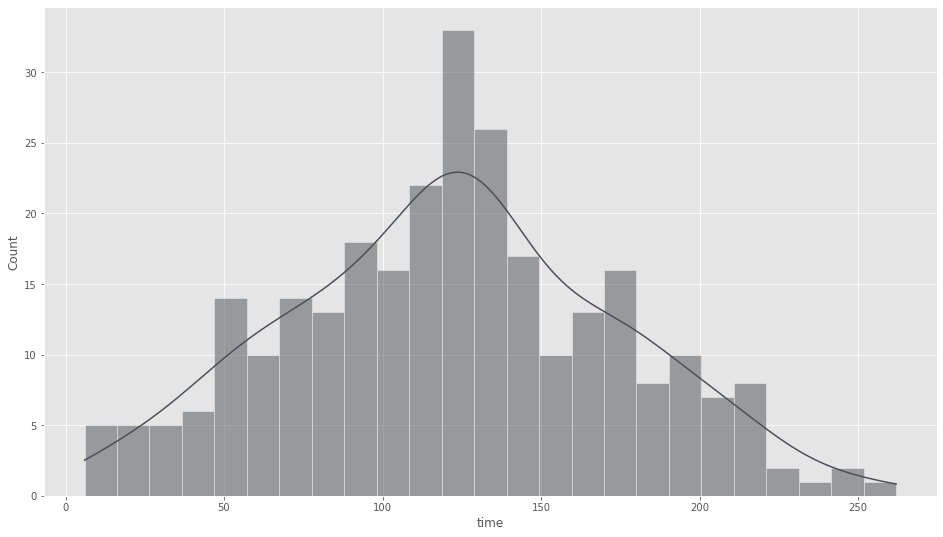

In [62]:
sns.histplot(df_sample['time'], bins=25, kde=True);

c:\users\izydom\documents\gmit\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\izydom\documents\gmit\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


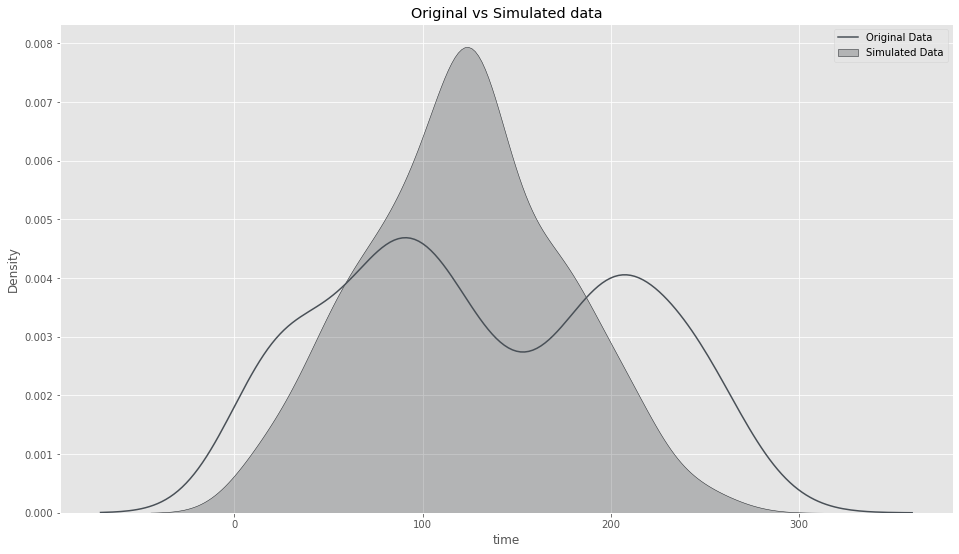

In [69]:
# Compare original vs simulated data
sns.distplot(df['time'],hist=False, label='Original Data').set(title='Original vs Simulated data');
sns.distplot(df_sample['time'],hist=False,kde_kws={"shade": True}, label ='Simulated Data');
plt.legend();

##### — Summary of Data Frame 

In [64]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# Simulated dataset
display(df_sample)

,sex,smoking,diabetes,anaemia,high_blood_pressure,death_event,age,serum_sodium,platelets,ejection_fraction,creatinine_phosphokinase,serum_creatinine,time
0,1,1,0,0,0,0,64,136,278498,18,51,2.00,128
1,1,0,0,0,0,0,75,137,355190,48,31,2.30,146
2,1,1,1,1,1,1,68,135,312293,71,285,1.76,111
3,0,0,1,1,1,0,52,132,197571,20,1275,1.33,74
4,0,0,0,0,0,0,54,134,215596,22,27,1.62,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,1,1,0,0,0,0,69,137,312503,17,2347,2.25,117
278,0,0,1,1,1,1,57,136,326896,19,45,1.95,199
279,0,0,1,1,1,1,64,136,288505,27,353,2.08,148
280,1,0,0,0,0,0,50,132,230302,56,167,1.22,127


In [65]:
# Shape of dataset.
df_sample.shape

(282, 13)

In [66]:
# Have a look at some basic statistical details.
df_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,282.0,0.659574,0.474695,0.0,0.000,1.000,1.00,1.00
smoking,282.0,0.333333,0.472243,0.0,0.000,0.000,1.00,1.00
diabetes,282.0,0.436170,0.496791,0.0,0.000,0.000,1.00,1.00
anaemia,282.0,0.450355,0.498414,0.0,0.000,0.000,1.00,1.00
high_blood_pressure,282.0,0.354610,0.479245,0.0,0.000,0.000,1.00,1.00
death_event,282.0,0.290780,0.454930,0.0,0.000,0.000,1.00,1.00
age,282.0,61.539007,9.800877,41.0,54.000,62.000,68.00,90.00
serum_sodium,282.0,135.234043,3.582556,126.0,133.000,135.000,138.00,145.00
platelets,282.0,253548.297872,80500.980607,11219.0,203280.500,258022.500,308382.50,504951.00
ejection_fraction,282.0,39.063830,17.519572,15.0,23.250,35.000,52.00,79.00


#### — 5. Conclusion 

Notebook contains data synthesis process of Cardiovascular disease dataset.

The whole process required analysis of real life dataset by preprocessing dataset from identifying the missing values, outliers to correlation, sex of patiens, risk factors according to gender of patients and distribution of the features.

The detailed analysis allowed to collect the necessary data and provided strong foundation on how this will be used in the process of data synthesis.

The gathered information was used to recreated dataset in the data synthesis process and then used for comparison with the original dataset.

#### — 6. References 


[1] — [Dataset: Heart Failure Prediction](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)

[2] — [HSE: Cardiovascular disease](https://www.hse.ie/eng/health/az/c/cardiovascular-disease/)

[3] — [PubMed: Serum creatinine concentration and risk of cardiovascular disease](https://pubmed.ncbi.nlm.nih.gov/9056611/)

[4] — [Numpy: random](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator)

[5] — [Data cleaning with Python](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b)

[6] — [Stackoverflow: Missing values](https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe)

[7] — [Correlation matrix](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

[8] — [Boxplot](https://en.wikipedia.org/wiki/Box_plot)

[9] — [Normality tests](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)

[9] — [Distribution fitting](https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed)

[10] — [Stackoverflow: Find Probability distribution](https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3)

***